In [7]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Load the environment
env = gym.make('FrozenLake-v0')

In [9]:
# The Q-Network Approach

# Implementing the network itself
tf.reset_default_graph()

In [10]:
# These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4], 0, 0.1))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

# Loss is calculated by taking the sum of squares of difference between the target and the predicted Q-values
nextQ = tf.placeholder(shape=[1,4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=1.0)
updateModel = trainer.minimize(loss)

In [37]:
# Training the network

init = tf.initialize_all_variables()

# Set learning parameters
y = 0.99
e = 0.2
num_episodes = 2000

# create lists to contain total rewards and steps per episode
jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        # Reset the environment and get the first observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        lr = 0.3
        
        # The Q-network
        while j < 99:
            j += 1
            
            # Choose an action by selecting greedily (with e chance of random action) from the Q-network
            a, allQ = sess.run([predict, Qout], feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
                
            # Get new state and reward from the environment
            s1, r, d, _ = env.step(a[0])
            
            # Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout, feed_dict={inputs1:np.identity(16)[s:s+1]})
            
            # Obtain maxQ' and set our target value for chosen action
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + y*maxQ1
            
            # Train our network using target and predicted Q values
            _, W1 = sess.run([updateModel, W], feed_dict={inputs1:np.identity(16)[s:s+1], nextQ:targetQ})
            rAll += r
            s = s1
            if d==True:
                # Reduce the chance of random action as we train the model
                e = 1./((i/50) + 10)
                
                lr = lr/3
                trainer = tf.train.GradientDescentOptimizer(learning_rate=lr)
                break
        jList.append(j)
        rList.append(rAll)
        
print(f"Percent of succesfull episodes: {sum(rList)/num_episodes}%")

Percent of succesfull episodes: 0.017%


In [38]:
print(a[0])
print(allQ)

1
[[0.01186102 0.01176529 0.01188001 0.01187371]]
0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

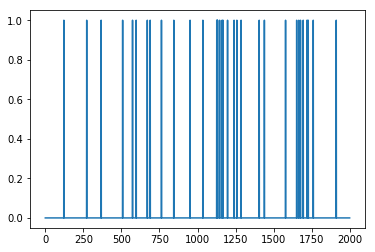

In [39]:
plt.plot(rList)